In [4]:
import json
import os

from groq import Groq
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# Dunning kruger effect


In [5]:
history = [{'human': 'Hi i(m thomas', 'AI': '{"confidence": 5, "tone": "Unassuming", "feedback": "Remember to capitalize the \'P\' in Python.", "follow_up_question": "What is your favorite feature of Python?", "expected_output": "A specific feature of Python, such as list comprehension, tuples, or the use of whitespace for indentation."}'}, {'human': "that it's a untyped language", 'AI': '{"confidence": 2, "tone": "", "feedback": "Python is dynamically typed rather than untyped. It means Python checks the type of the variable at runtime.", "follow_up_question": "Can you name a few basic data types in Python?", "expected_output": ""}'}, {'human': 'int, float, np.f32, char, string', 'AI': '{"confidence": 6, "tone": "Assertive", "feedback": "Good job! You mentioned int, float, and string. However, there is no \'char\' data type in Python. Strings are sequences of characters. np.f32 is a NumPy data type.", "follow_up_question": "What is the output of the following code snippet?\\nnum = 5\\nprint(type(num))", "expected_output": "<class \'int\'>"}'}, {'human': 'int', 'AI': '{"confidence": 8, "tone": "Confident", "feedback": "Correct! You\' reverse-engineered the information I provided earlier. Great job.", "follow_up_question": "How would you declare a variable-length string in Python?", "expected_output": ""}'}]

In [6]:
history

[{'human': 'Hi i(m thomas',
  'AI': '{"confidence": 5, "tone": "Unassuming", "feedback": "Remember to capitalize the \'P\' in Python.", "follow_up_question": "What is your favorite feature of Python?", "expected_output": "A specific feature of Python, such as list comprehension, tuples, or the use of whitespace for indentation."}'},
 {'human': "that it's a untyped language",
  'AI': '{"confidence": 2, "tone": "", "feedback": "Python is dynamically typed rather than untyped. It means Python checks the type of the variable at runtime.", "follow_up_question": "Can you name a few basic data types in Python?", "expected_output": ""}'},
 {'human': 'int, float, np.f32, char, string',
  'AI': '{"confidence": 6, "tone": "Assertive", "feedback": "Good job! You mentioned int, float, and string. However, there is no \'char\' data type in Python. Strings are sequences of characters. np.f32 is a NumPy data type.", "follow_up_question": "What is the output of the following code snippet?\\nnum = 5\\np

In [7]:
import json
import os
import re

from groq import Groq
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

def get_similarity_rating(human_msg, ai_msg):
    from groq import Groq

    client = Groq(
        api_key='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',
    )

    system_prompt = '''you are a jury rating on a scale from 0 to 10 the similarity in meaning of the two sentences that i am going to give you. Your aim is only to output a number between 0 and 10.
    INSTRUCTIONS: You will output the rating in the following pattern: "0-10".
    
    EXAMPLE:
        user_input: Sentence 1): i like apples ; Sentence 2): the sky is blue
        ideal_output: 0
    IMPORTANT: The output must be a number between 0 and 10 in the pattern "0". IF YOU START THE MESSAGE WITH ANYTHING ELSE THAN NUMBERS, YOU WILL BE KILLED.'''

    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": "Sentence 1): " + human_msg + " Sentence 2): " + ai_msg
            }
        ],
        model="mixtral-8x7b-32768",
        max_tokens=3,
    )
    msg = chat_completion.choices[0].message.content
    def is_number_with_newline(input_string):
        return bool(re.match(r'^\d', input_string))

    if not is_number_with_newline(msg):
        print(msg)
        chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": "Sentence 1): " + human_msg + " Sentence 2): " + ai_msg + " JUST OUTPUT THE NUMBER :"
            }
        ],
        model="mixtral-8x7b-32768",
        max_tokens=3,
        )
        msg = chat_completion.choices[0].message.content
        print(msg)

    return int(msg)


I will follow
0


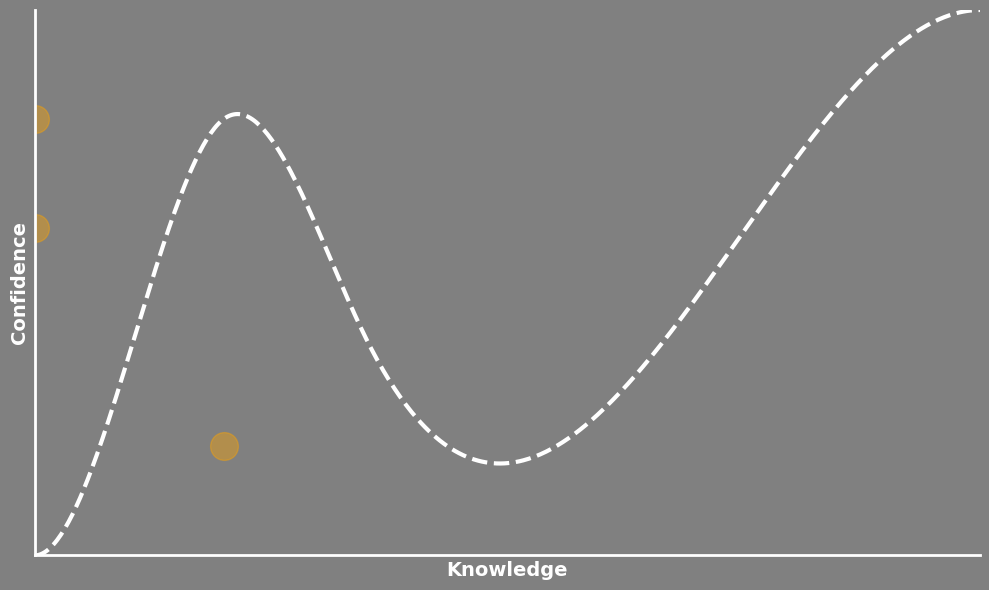

In [8]:




def plot_DK_curve(history):
    # Define the points
    x_points = np.array([0, 2, 3.5, 10])
    y_points = np.array([0, 8, 4, 10])

    # Create a cubic spline interpolation
    cspl = CubicSpline(x_points, y_points, bc_type='clamped')

    # Generate x values for the full range
    x = np.linspace(0, 10, 500)
    y = cspl(x)

    # Ensure the y values stay within the range [0, 10]

    dk_dict = {"rating": [], "confidence": []}
    for i in range(len(history)-1):
        human_msg = history[i+1]['human']
        ai_msg = json.loads(history[i]['AI'])["expected_output"]
        rating = get_similarity_rating(human_msg, ai_msg)
        dk_dict['rating'].append(int(rating))
        confidence = json.loads(history[i+1]['AI'])["confidence"]
        dk_dict['confidence'].append(int(confidence))

    # Plotting
    plt.figure(figsize=(10, 6),facecolor='gray')
    plt.plot(dk_dict['rating'], dk_dict['confidence'], 'o', color='orange', markersize=20, alpha=0.4)
    plt.plot(x, y, '--',color='white',linewidth=3)

    # Customizing the plot
    plt.gca().set_facecolor('gray')
    plt.gca().spines['top'].set_color('none')
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['left'].set_color('white')
    plt.gca().spines['left'].set_linewidth(2)
    plt.gca().spines['bottom'].set_color('white')
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().tick_params(axis='x', colors='white')
    plt.gca().tick_params(axis='y', colors='white')
    plt.gca().xaxis.label.set_color('white')
    plt.gca().xaxis.label.set_fontsize(14)
    plt.gca().yaxis.label.set_fontsize(14)
    plt.gca().yaxis.label.set_color('white')
    plt.gca().title.set_color('darkgray')

    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel('Knowledge', weight='bold')
    plt.ylabel('Confidence', weight='bold')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.savefig('./DK_curve.png', facecolor='darkgray')

 

plot_DK_curve(history)
    

In [9]:
say yes or no if its over 5 and then coller la courbe avec perturbations

SyntaxError: expected 'else' after 'if' expression (3402448548.py, line 1)

# plotting confidence over time


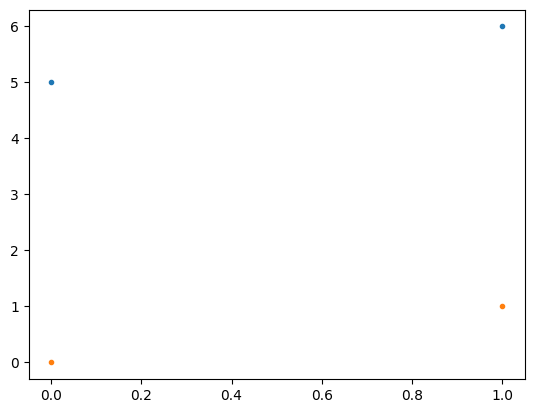

In [ ]:
def retrieve_confidence(history):
    confidence = []
    for i in range(len(history)):
        confidence.append(int(json.loads(history[i]['AI'])["confidence"]))
    return confidence
plt.plot(retrieve_confidence(history),'.')

def retrieve_rating(history):
    rating = []
    for i in range(len(history)):
        rating.append(get_similarity_rating(history[i]['human'], json.loads(history[i]['AI'])["expected_output"]))
    return rating
plt.plot(retrieve_rating(history),'.')

# comment on style and delivery


In [ ]:
# gather every deliveries that the user did and concatenate the into a single string
deliveries = []
for i in range(len(history)):
    deliveries.append(history[i]['human'])
deliveries = ' ;'.join(deliveries)

# ask the model to generate a feedback based on the deliveries

def get_similarity_rating(human_msg):
    from groq import Groq

    client = Groq(
        api_key='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',
    )

    system_prompt = '''you are a jury rating the quality of delivery and fiving three pointers to bring the delivery to the best delivery possible to the intented and very knowledgeable audience.
    
    EXAMPLE:
        user_input: i like innputs and girls, but i prefer blokes.
        output : first point: your message is not clear you should refine the main message that you want to convey. Second point: you should use shorter senteces to give more rythm to your message. Third point : you shoudl use more formal language
    IMPORTANT:
        The output must be a list of three points. Each point should be a sentence.'''

    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": human_msg
            }
        ],
        model="mixtral-8x7b-32768",
        max_tokens=248,
    )

    return chat_completion.choices[0].message.content

get_similarity_rating(deliveries)

"First point: It' D beneficial to directly state your topic of interest in the beginning to give a clear direction for your audience.\nSecond point: Using consistent and appropriate grammar throughout your delivery will improve the flow and understanding for your audience.\nThird point: Providing more detailed and specific examples or explanations on your preferance towards a certain topic will engage your knowledgeable audience.\n\n(Note: In the first sentence, I assumed the topic of interest was related to programming, based on the examples and words used.)"

In [10]:
deliveries

NameError: name 'deliveries' is not defined

In [11]:
{
    "confidence": 2,
    "tone": "Unassuming",
    "feedback": "Nice to meet you, Thomas! Let's start with a simple SQL query. What is the syntax for selecting all columns and rows from a table called 'employees'?",
    "follow_up_question": "Now, Thomas, can you write a query that retrieves only the 'first_name' and 'salary' columns from the 'employees' table?",
    "expected_output": "The output should be a SELECT statement, retrieving 'first\_name' and 'salary' columns from the 'employees' table."
}["confidence"]

2

# clean up json


In [12]:
import json

def clean_json(data):
    # Ensure the input data is in dictionary format
    if isinstance(data, str):
        data = json.loads(data)
    
    # Clean the data
    cleaned_data = {
        "confidence": data.get("confidence", ""),
        "tone": data.get("tone", "").strip(),
        "feedback": data.get("feedback", "").strip(),
        "follow_up_question": data.get("follow_up_question", "").strip(),
        "expected_output": data.get("expected_output", "").strip().replace('\\_', '_')
    }
    
    # Encode the data to UTF-8
    cleaned_json = json.dumps(cleaned_data, ensure_ascii=False).encode('utf-8')
    
    return cleaned_json

# Example usage
data = {
    "confidence": 2,
    "tone": "Unassuming",
    "feedback": "Nice to meet you, Thomas! Let's start with a simple SQL query. What is the syntax for selecting all columns and rows from a table called 'employees'?",
    "follow_up_question": "Now, Thomas, can you write a query that retrieves only the 'first_name' and 'salary' columns from the 'employees' table?",
    "expected_output": "The output should be a SELECT statement, retrieving 'first\\_name' and 'salary' columns from the 'employees' table."
}

cleaned_json = clean_json(data)
print(cleaned_json.decode('utf-8'))


{"confidence": 2, "tone": "Unassuming", "feedback": "Nice to meet you, Thomas! Let's start with a simple SQL query. What is the syntax for selecting all columns and rows from a table called 'employees'?", "follow_up_question": "Now, Thomas, can you write a query that retrieves only the 'first_name' and 'salary' columns from the 'employees' table?", "expected_output": "The output should be a SELECT statement, retrieving 'first_name' and 'salary' columns from the 'employees' table."}


In [13]:
import json
import re

def sanitize_text_for_json(text):
    # Remove any control characters or non-printable characters
    text = re.sub(r'[^\x20-\x7E]+', '', text)
    
    # Ensure that backslashes and quotes are properly escaped
    text = text.replace('\\', '\\\\').replace('"', '\\"')
    
    # Add a basic structure if necessary
    if not (text.startswith('{') and text.endswith('}')):
        text = '{' + text + '}'

    # Attempt to load the JSON, correcting common issues
    try:
        # Try to parse the JSON
        data = json.loads(text)
    except json.JSONDecodeError as e:
        # If JSON is invalid, attempt to fix common issues
        print(f"Initial JSON decoding failed: {e}")
        text = re.sub(r',\s*}', '}', text)  # Remove trailing commas before closing brace
        text = re.sub(r',\s*]', ']', text)  # Remove trailing commas before closing bracket
        text = re.sub(r'"\s*:\s*"', '": "', text)  # Ensure proper spacing around colons
        
        # Attempt to parse again
        try:
            data = json.loads(text)
        except json.JSONDecodeError as e:
            raise ValueError(f"Sanitization failed: {e}")
    
    return data

# Example usage
text_output = '''
{
    "confidence": 2,
    "tone": "Unassuming",
    "feedback": "Nice to meet you, Thomas! Let's start with a simple SQL query. What is the syntax for selecting all columns and rows from a table called 'employees'?",
    "follow_up_question": "Now, Thomas, can you write a query that retrieves only the 'first_name' and 'salary' columns from the 'employees' table?",
    "expected_output": "The output should be a SELECT statement, retrieving 'first\\_name' and 'salary' columns from the 'employees' table.",
}
'''

sanitized_json = sanitize_text_for_json(text_output)
print(json.dumps(sanitized_json, indent=2, ensure_ascii=False))


Initial JSON decoding failed: Expecting property name enclosed in double quotes: line 1 column 6 (char 5)


ValueError: Sanitization failed: Expecting property name enclosed in double quotes: line 1 column 6 (char 5)

In [14]:
def clean_llm_output(llm_output):
    # Remove any extraneous characters before the first { and after the last }
    start_index = llm_output.find('{')
    end_index = llm_output.rfind('}') + 1
    json_like_str = llm_output[start_index:end_index]
    
    # Remove any invalid characters (non-printable ASCII characters)
    json_like_str = re.sub(r'[^\x20-\x7E]+', '', json_like_str)
    
    # Correct any common JSON issues
    json_like_str = json_like_str.replace('\\"', '"')  # Fix improperly escaped quotes
    json_like_str = re.sub(r',\s*}', '}', json_like_str)  # Remove trailing commas before closing brace
    json_like_str = re.sub(r',\s*]', ']', json_like_str)  # Remove trailing commas before closing bracket
    
    # Validate and load the JSON
    try:
        data = json.loads(json_like_str)
    except json.JSONDecodeError as e:
        raise ValueError(f"Failed to parse JSON: {e}")
    
    return data

In [20]:
def clean_llm_output(text):
    # Define the expected keys
    expected_keys = ["confidence", "tone", "feedback", "follow_up_question", "expected_output"]
    
    # Remove any leading or trailing characters that are not part of the JSON structure
    text = text.strip().strip("")
    
    # Replace any occurrences of single backslashes with double backslashes for escaping
    text = text.replace('\\', '\\\\')
    
    # Ensure the quotes are properly escaped
    text = re.sub(r'(?<!\\)"', r'\\"', text)
    
    # Add back the leading and trailing braces if they were removed
    if not text.startswith('{'):
        text = '{' + text
    if not text.endswith('}'):
        text = text + '}'
    
    # Attempt to load the JSON
    try:
        data = json.loads(text)
    except json.JSONDecodeError as e:
        # If JSON is invalid, try to reconstruct it
        print(f"Initial JSON decoding failed: {e}")
        
        # Use regular expressions to extract the key-value pairs
        key_value_pairs = re.findall(r'"(confidence|tone|feedback|follow_up_question|expected_output)"\s*:\s*"(.*?)"', text)
        data = {k: v for k, v in key_value_pairs}
        
        # Ensure all expected keys are present
        for key in expected_keys:
            if key not in data:
                data[key] = ""

    return data

In [21]:

# Example usage
llm_output = '''{"confidence": 2, "tone": "Confident", "feedback": "That' interview-like role-play can be challenging. Let's try a simple topic instead. Can you explain what a variable is and how it's used in programming?", "follow_ variables in programming. In many programming languages, including Python, you can create a variable by assigning a value to it using the equals sign. Here's an example in Python:x = 5print(x)Output: `5`Can you provide a similar example in another programming language?", "expected_output": "In this example, a variable called 'x' is created and assigned the value 5. The value can later be changed or manipulated in the program. Here' `x = 5print(x)Output: `5`Can you provide a similar example in another programming language?", "expected_output": "In this example, a variable called 'x' is created and assigned the value 5. The value can later be changed or manipulated in the program. Here's a JavaScript example:let x = 5;console.log(x);Output: `5`"}'''

cleaned_data = clean_llm_output(llm_output)
print(json.dumps(cleaned_data, indent=2, ensure_ascii=False))

Initial JSON decoding failed: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
{
  "confidence": "",
  "tone": "",
  "feedback": "",
  "follow_up_question": "",
  "expected_output": ""
}
